In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import G,m_p, M_sun

# Composition and Entropy

In [2]:
#Read Composition files from Rüdiger
df=pd.read_csv("input_data/donor_composition.csv")
#df=pd.read_csv("input_data/remnant_composition.csv")

In [3]:
nickel_cut=2.0
he_cut="normal"    ## No helium cut
#he_cut="no"
#he_cut="tail"      ## Only 1% mass coordinate has it
#he_cut="replaced"  ## Replaced with C12


In [4]:
###Add He and O18 but make them 0 along with hydrogen
import astropy.units as u
df['xn_he3,'] = 0.0e0
df['xn_o18,'] = 0.0e0
df['xn_prot,'] = 0.0e0
df['xn_fe56,'] = 0.0e0
df['xn_co56,'] = 0.0e0
df['xn_cr56,'] = 0.0e0
df['xn_co56,'] = 0.0e0

df["embedded_mass"]=df["mass,"].cumsum()
he_mass=(df["mass,"]*df["xn_he4,"]).sum()*u.g/u.M_sun
print(he_mass.cgs)

0.024735624262667913


In [5]:
#columns_to_keep = ['mass,','embedded_mass','r_outer,', 'xn_n,','xn_p,','xn_prot,','xn_he3,', 'xn_he4,','xn_c12,','xn_n14,','xn_o16,','xn_ne20,','xn_mg24,',
#                   'xn_si28,','xn_s32,','xn_ar36,','xn_ca40,','xn_ti44,','xn_cr48,','xn_cr56,','xn_fe52,','xn_fe54,','xn_fe56,','xn_co56,','xn_ni56,','density,','T,']
columns_to_keep = ['mass,','embedded_mass','r_outer,', 'xn_p,','xn_he3,', 'xn_he4,','xn_c12,','xn_n14,','xn_o16,','xn_o18,','xn_ne20,','xn_ne22,','xn_mg24,',
                   'xn_si28,','xn_fe56,','xn_co56,','xn_ni56,','density,','T,']
df=df[columns_to_keep]
print(len(df.columns))
df["mass_coord"]=df["embedded_mass"]/M_sun.cgs.value
df["embedded_mass"]=(df["embedded_mass"]/df["mass,"].sum())
df["q_m"]=1.0e00-df["embedded_mass"]
df.loc[df['q_m'] < 0, 'q_m'] = 0 #Due to numerics

print(df)

19
            mass,  embedded_mass      r_outer,         xn_p,  xn_he3,  \
0    1.379065e+30          0.001  4.245878e+07  1.000000e-30      0.0   
1    1.379177e+30          0.002  5.359815e+07  1.000000e-30      0.0   
2    1.379142e+30          0.003  6.141454e+07  1.000000e-30      0.0   
3    1.379193e+30          0.004  6.766918e+07  1.000000e-30      0.0   
4    1.379257e+30          0.005  7.295333e+07  1.000000e-30      0.0   
..            ...            ...           ...           ...      ...   
995  1.379073e+30          0.996  1.761303e+09  7.678807e-18      0.0   
996  1.379146e+30          0.997  1.768150e+09  6.970498e-18      0.0   
997  1.379303e+30          0.998  1.774383e+09  6.356768e-18      0.0   
998  1.379104e+30          0.999  1.780037e+09  5.365813e-18      0.0   
999  1.379416e+30          1.000  1.785177e+09  5.598719e-18      0.0   

          xn_he4,   xn_c12,       xn_n14,   xn_o16,  xn_o18,  ...  \
0    1.877212e-24  0.500000  1.400000e-29  0.500000

In [6]:
if he_cut=="replaced":
    df["xn_c12,"]=df["xn_c12,"]+df["xn_he4,"]
    df["xn_he4,"]=0*df["xn_he4,"]
elif he_cut=="no":
    df["xn_he4,"]=0*df["xn_he4,"]   

df2=df.columns[3:17]
print(df2)
df[df2]= df[df2].div(df[df2].sum(axis=1), axis=0) #Since originally we had more elements we need to renomarlize

Index(['xn_p,', 'xn_he3,', 'xn_he4,', 'xn_c12,', 'xn_n14,', 'xn_o16,',
       'xn_o18,', 'xn_ne20,', 'xn_ne22,', 'xn_mg24,', 'xn_si28,', 'xn_fe56,',
       'xn_co56,', 'xn_ni56,'],
      dtype='object')


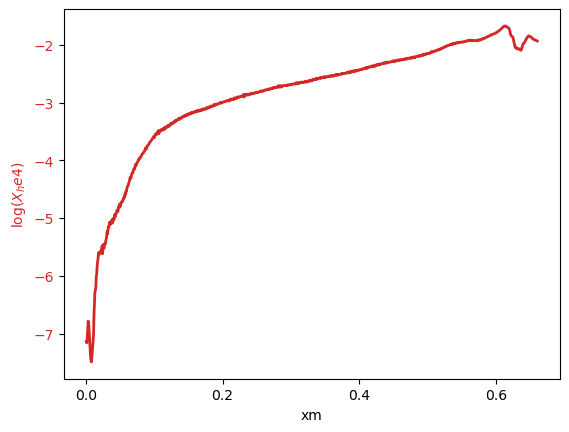

In [7]:
color = 'tab:red'
fig, ax1 = plt.subplots()
plt.rcParams["lines.linewidth"]=2
plt.rcParams["font.size"]=16
ax1.set_xlabel('xm')
ax1.set_ylabel(r'log($X_he4$)', color=color)
ax1.plot(df["mass_coord"], np.log10(df["xn_he4,"]), color=color)
ax1.tick_params(axis='y', labelcolor=color)

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#ax2.set_ylabel('log(T)', color=color)  # we already handled the x-label with ax1
#ax2.plot(np.log10(df["r_outer,"]*10e-5), np.log10(df["T,"]), color=color)
#ax2.tick_params(axis='y', labelcolor=color)

In [8]:
gravity=df["mass,"].cumsum()/df["r_outer,"]
gravity=G.cgs.value*gravity
nickel=5.38*df["xn_ni56,"]*(1.6e-6)/(56*m_p.cgs.value) #5.38 MeV from Ni56 to Iron
print(nickel)
print(gravity)



0      5.146411e-12
1      5.146411e-12
2      5.146411e-12
3      5.146411e-12
4      5.146411e-12
           ...     
995    7.167753e+16
996    7.169036e+16
997    7.171433e+16
998    7.120423e+16
999    7.096731e+16
Name: xn_ni56,, Length: 1000, dtype: float64
0      1.781929e+15
1      2.828801e+15
2      3.701413e+15
3      4.476200e+15
4      5.188203e+15
           ...     
995    6.853981e+15
996    6.616371e+15
997    6.384369e+15
998    6.166752e+15
999    5.965111e+15
Length: 1000, dtype: float64


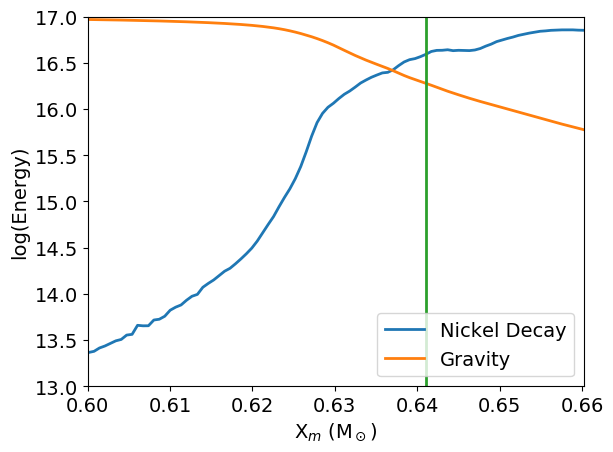

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.plot(df["mass_coord"],np.log10((nickel)))
plt.plot(df["mass_coord"],np.log10(gravity))
plt.xlabel("X$_m$ (M$_\odot$)")
plt.ylabel("log(Energy)")
plt.legend(["Nickel Decay","Gravity"])
plt.xlim(0.6,np.max(df["mass_coord"]))
plt.ylim(13,17)

plt.plot((df["mass_coord"][(nickel/gravity)>2].iloc[0],
          df["mass_coord"][(nickel/gravity)>2].iloc[0]),(13,17))


In [7]:
diff=970#np.abs((-nickel/gravity)+nickel_cut).argmin()
print(diff)
df = df.drop(df.index[diff:])
if he_cut=="tail":
    df["xn_he4,"][df["mass_coord"]<0.99*np.max(df["mass_coord"])]=0
    df[df2]= df[df2].div(df[df2].sum(axis=1), axis=0) #Since originally we had more elements we need to renomarlize
print(df)



970
            mass,  embedded_mass     r_outer,         xn_p,  xn_he3,  \
0    1.379065e+30          0.001   42458782.0  1.000000e-30      0.0   
1    1.379177e+30          0.002   53598152.0  1.000000e-30      0.0   
2    1.379142e+30          0.003   61414538.0  1.000000e-30      0.0   
3    1.379193e+30          0.004   67669185.0  1.000000e-30      0.0   
4    1.379257e+30          0.005   72953329.0  1.000000e-30      0.0   
..            ...            ...          ...           ...      ...   
965  1.379115e+30          0.966  779153390.0  1.509729e-20      0.0   
966  1.379242e+30          0.967  782972160.0  1.944650e-20      0.0   
967  1.379029e+30          0.968  787031510.0  2.795050e-20      0.0   
968  1.379330e+30          0.969  791349170.0  3.343583e-20      0.0   
969  1.379027e+30          0.970  795877190.0  3.831493e-20      0.0   

          xn_he4,   xn_c12,       xn_n14,   xn_o16,  xn_o18,  ...  \
0    1.877212e-24  0.500000  1.400000e-29  0.500000      0.0  

In [8]:
df["q_m"]=1-(df["mass,"].cumsum()/df["mass,"].sum())
df.loc[df['q_m'] < 0, 'q_m'] = 0 #Due to numerics

print(df)

            mass,  embedded_mass     r_outer,         xn_p,  xn_he3,  \
0    1.379065e+30          0.001   42458782.0  1.000000e-30      0.0   
1    1.379177e+30          0.002   53598152.0  1.000000e-30      0.0   
2    1.379142e+30          0.003   61414538.0  1.000000e-30      0.0   
3    1.379193e+30          0.004   67669185.0  1.000000e-30      0.0   
4    1.379257e+30          0.005   72953329.0  1.000000e-30      0.0   
..            ...            ...          ...           ...      ...   
965  1.379115e+30          0.966  779153390.0  1.509729e-20      0.0   
966  1.379242e+30          0.967  782972160.0  1.944650e-20      0.0   
967  1.379029e+30          0.968  787031510.0  2.795050e-20      0.0   
968  1.379330e+30          0.969  791349170.0  3.343583e-20      0.0   
969  1.379027e+30          0.970  795877190.0  3.831493e-20      0.0   

          xn_he4,   xn_c12,       xn_n14,   xn_o16,  xn_o18,  ...  \
0    1.877212e-24  0.500000  1.400000e-29  0.500000      0.0  ... 

In [9]:
df.insert(0,"q_m",df.pop("q_m"))
df=df.loc[::-1].reset_index(drop=True) #Same for Entropy
print(df)

          q_m         mass,  embedded_mass     r_outer,         xn_p,  \
0    0.000000  1.379027e+30          0.970  795877190.0  3.831493e-20   
1    0.001031  1.379330e+30          0.969  791349170.0  3.343583e-20   
2    0.002062  1.379029e+30          0.968  787031510.0  2.795050e-20   
3    0.003093  1.379242e+30          0.967  782972160.0  1.944650e-20   
4    0.004124  1.379115e+30          0.966  779153390.0  1.509729e-20   
..        ...           ...            ...          ...           ...   
965  0.994845  1.379257e+30          0.005   72953329.0  1.000000e-30   
966  0.995876  1.379193e+30          0.004   67669185.0  1.000000e-30   
967  0.996907  1.379142e+30          0.003   61414538.0  1.000000e-30   
968  0.997938  1.379177e+30          0.002   53598152.0  1.000000e-30   
969  0.998969  1.379065e+30          0.001   42458782.0  1.000000e-30   

     xn_he3,       xn_he4,   xn_c12,       xn_n14,   xn_o16,  ...  \
0        0.0  3.286393e-01  0.335681  2.204191e-21  0.

In [13]:
print(df.columns)

Index(['q_m', 'mass,', 'embedded_mass', 'r_outer,', 'xn_n,', 'xn_p,',
       'xn_prot,', 'xn_he3,', 'xn_he4,', 'xn_c12,', 'xn_n14,', 'xn_o16,',
       'xn_ne20,', 'xn_mg24,', 'xn_si28,', 'xn_s32,', 'xn_ar36,', 'xn_ca40,',
       'xn_ti44,', 'xn_cr48,', 'xn_cr56,', 'xn_fe52,', 'xn_fe54,', 'xn_fe56,',
       'xn_co56,', 'xn_ni56,', 'density,', 'T,', 'mass_coord'],
      dtype='object')


In [10]:
'''
df_comp=df[['q_m','xn_n,', 'xn_p,','xn_prot,',
        'xn_he3,', 'xn_he4,', 'xn_c12,', 'xn_n14,', 'xn_o16,',
        'xn_ne20,', 'xn_mg24,', 'xn_si28,', 'xn_s32,', 'xn_ar36,',
       'xn_ca40,', 'xn_ti44,', 'xn_cr48,', 'xn_cr56,', 'xn_fe52,', 'xn_fe54,',
       'xn_fe56,', 'xn_co56,', 'xn_ni56,']]
'''
#For making EOS/entropy files:
df_comp=df[['q_m','xn_p,', 'xn_he3,','xn_he4,', 'xn_c12,', 'xn_n14,', 'xn_o16,', 'xn_o18,', 'xn_ne20,',
       'xn_ne22,', 'xn_mg24,', 'xn_si28,','xn_fe56,', 'xn_co56,','xn_ni56,']]
df_comp.to_csv(f'output_data/composition_normaldonor_2.0timesNi56.dat', sep='\t', index=False)
df_ent=df[['q_m','density,','T,']]
df_ent.to_csv(f'output_data/donor_entropy_{he_cut}helium_{nickel_cut}timesNi56.dat', sep='\t', index=False)

print(df_comp)


          q_m         xn_p,  xn_he3,       xn_he4,   xn_c12,       xn_n14,  \
0    0.000000  3.831493e-20      0.0  3.286393e-01  0.335681  2.204191e-21   
1    0.001031  3.343583e-20      0.0  3.039285e-01  0.348036  1.896286e-21   
2    0.002062  2.795050e-20      0.0  3.102362e-01  0.344882  1.557154e-21   
3    0.003093  1.944650e-20      0.0  2.964887e-01  0.351756  1.089129e-21   
4    0.004124  1.509729e-20      0.0  2.937238e-01  0.353138  8.485297e-22   
..        ...           ...      ...           ...       ...           ...   
965  0.994845  1.000000e-30      0.0  1.636979e-14  0.500000  1.400000e-29   
966  0.995876  1.000000e-30      0.0  9.283777e-15  0.500000  1.400000e-29   
967  0.996907  1.000000e-30      0.0  6.279658e-17  0.500000  1.400000e-29   
968  0.997938  1.000000e-30      0.0  3.518769e-20  0.500000  1.400000e-29   
969  0.998969  1.000000e-30      0.0  1.877212e-24  0.500000  1.400000e-29   

      xn_o16,  xn_o18,      xn_ne20,      xn_ne22,      xn_mg24

In [15]:
file_path=f"output_data_paper/composition_approx21plusco56_{he_cut}helium_{nickel_cut}timesNi56.dat"
print(file_path)

output_data_paper/composition_approx21plusco56_normalhelium_1.5timesNi56.dat


In [16]:
with open(file_path,'w') as file:
    file.write(f'{len(df_comp)} {len(df_comp.columns)-1}\n')
    df_comp.to_csv(file, sep='\t', header=False, index=False)


In [17]:
file_path=f"output_data_paper/remnant_entropy_approx21plusco56_{he_cut}helium_{nickel_cut}timesNi56.dat"
df_ent=df[['q_m','density,','T,']]
with open(file_path,'w') as file:
    file.write(f'{len(df_comp)}\n')
    df_ent.to_csv(file, sep='\t', header=False, index=False)

# Plotting

In [18]:
columns_to_plot = [ 'xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59'
       
       ]


In [19]:
print(df.columns)
print(len(df.columns))

Index(['q_m', 'mass,', 'embedded_mass', 'r_outer,', 'xn_n,', 'xn_p,',
       'xn_prot,', 'xn_he3,', 'xn_he4,', 'xn_c12,', 'xn_n14,', 'xn_o16,',
       'xn_o18,', 'xn_ne20,', 'xn_mg24,', 'xn_si28,', 'xn_s32,', 'xn_ar36,',
       'xn_ca40,', 'xn_ti44,', 'xn_cr48,', 'xn_cr56,', 'xn_fe52,', 'xn_fe54,',
       'xn_fe56,', 'xn_co56,', 'xn_ni56,', 'density,', 'T,', 'mass_coord'],
      dtype='object')
30


Text(0, 0.5, 'log(Xn)')

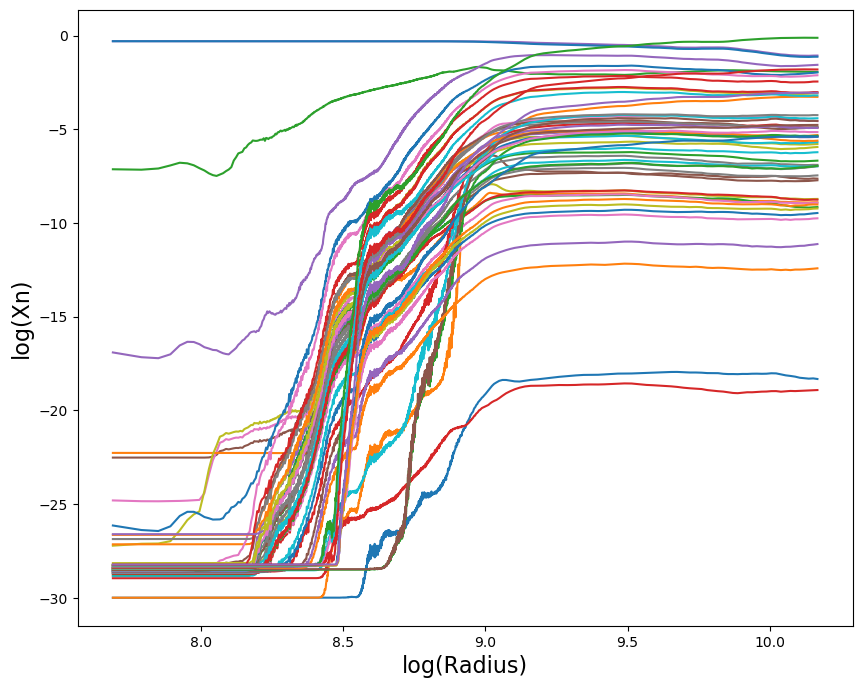

In [24]:
import matplotlib.pyplot as plt
import numpy as np
num_columns = len(df[columns_to_plot].columns[:-1])  # Exclude the X-axis column
#print(num_columns)
plt.figure(figsize=(10, 8))
for i, column in enumerate(df[columns_to_plot].columns[:]):
    if max(df[column])>1.0e-25:
        plt.plot(np.log10(df["r_outer,"]), np.log10(df[column]), label=column)
    
plt.xlabel("log(Radius)",fontsize=16)
plt.ylabel("log(Xn)",fontsize=16)
#plt.legend(loc='best', bbox_to_anchor=(1, 0.5),fontsize='large')
#plt.ylim(-8,0)